<a href="https://colab.research.google.com/github/flyforward2016/fastbook/blob/master/clean/02_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.7MB/s 
     |████████████████████████████████| 194kB 35.1MB/s 
     |████████████████████████████████| 1.1MB 26.4MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
Mounted at /content/gdrive


In [ ]:
!pwd

/content


In [ ]:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials


In [ ]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

# From Model to Production

## The Practice of Deep Learning

### Starting Your Project

### The State of Deep Learning

#### Computer vision

#### Text (natural language processing)

#### Combining text and images

#### Tabular data

#### Recommendation systems

#### Other data types

### The Drivetrain Approach

## Gathering Data

# clean
To download images with Bing Image Search, sign up at Microsoft for a free account. You will be given a key, which you can copy and enter in a cell as follows (replacing 'XXX' with your key and executing it):




[Bing Search Help](https://forums.fast.ai/t/getting-the-bing-image-search-key/67417)

[Help from Fastai Forum](https://forums.fast.ai/t/getting-the-bing-image-search-key/67417/64)



In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', 'e81a9f987db444279ed8c18be8634b9d')

In [ ]:
#search_images_bing

In [ ]:
!pip install bing-image-downloader

In [ ]:
# # This is to save in the colab directory
# # bing_image_downloader - https://pypi.org/project/bing-image-downloader/
# from bing_image_downloader import downloader
# for q in ["Black Bear","Grizzly Bear","Teddy Bear"]:
#     downloader.download(q, limit=5, output_dir='/Fastai/bears', adult_filter_off=True, force_replace=False, timeout=5)
# # The bing_image_downloader will search q in their database
# # for output_dir, right click on the folder from the Files list and paste it here. 
# # /content/Fastai/bears - Content is the current directory. This will make the final dir: content/content/Fastai/bears

In [ ]:
## Original Code from Fastai
# results = search_images_bing(key, 'grizzly bear')
# ims = results.attrgot('content_url')
# ims
# doc(search_images_bing) # search_images_bing is a function in utilis.py
#hide
#ims = ['http://wiseaboutbears.org/wp-content/uploads/2014/06/June-13-2010-095.jpg']

In [ ]:
# # Save at Colab
# dest = '/content/Fastai/bears/Black Bear/Image_5.jpg'
# im = Image.open(dest)
# im.to_thumb(128,128)

In [ ]:
# # How to create folder
# from pathlib import Path

# # create the directory structure
# dog_dir = Path().cwd() / 'gdrive' / 'My Drive' / 'data' / 'dog_breed_classifier'
# dog_dir.mkdir(parents=True, exist_ok=True)
# dog_dir.is_dir() # testing

True

In [ ]:
# This is to save in my Gdrive. 
from bing_image_downloader import downloader
for q in ["Black Bear","Grizzly Bear","Teddy Bear"]:
    downloader.download(q, limit=150, output_dir='/gdrive/MyDrive/Colab_Notebooks/Fastai/bears', adult_filter_off=True, force_replace=False, timeout=5)
# Click on the files under gdrive root and copy path. 
#/content/gdrive/MyDrive/Colab_Notebooks/Fastai/bears  



[!!]Indexing page: 1

[%] Indexed 150 Images on Page 1.


[%] Downloading Image #1 from http://snowbrains.com/wp-content/uploads/2015/08/American-Black-Bear-jpg.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.gannett-cdn.com/-mm-/98e9eb0055148d8550b3a7d264f19fd6462e6062/c=0-213-4288-2636/local/-/media/2017/03/22/CarolinaGroup/Asheville/636257813777562324-Black-bear-Getty-images.jpg?width=3200&amp;height=1680&amp;fit=crop
[%] File Downloaded !

[%] Downloading Image #3 from https://media.spokesman.com/photos/2017/07/04/BLACK_BEAR.JPG.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://d.newsweek.com/en/full/1258575/black-bear.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://revelstokebearaware.org/wp-content/uploads/Black-bear1.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://snowbrains.com/wp-content/uploads/2015/08/connie-lemperle-black-bear-web.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.greats

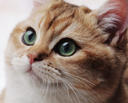

In [ ]:
# Save in the GDrive
dest = '/content/gdrive/MyDrive/Colab_Notebooks/Fastai/bears/Teddy Bear/Image_120.jpg'
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
# # Check whether there is any bad image from colab folder
# bear_types = 'grizzly','black','teddy'
# path = Path('/content/Fastai/bears')

In [ ]:
# Check whether there is any bad image from gdrive folder
bear_types = 'grizzly','black','teddy'
path = Path('/content/gdrive/MyDrive/Colab_Notebooks/Fastai/bears')

In [ ]:
# This is the original image download function,since we have already used bing_image_dowloader, this is not used. 
# if not path.exists():
#     path.mkdir()
#     for o in bear_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o} bear')
#         download_images(dest, urls=results.attrgot('content_url'))

In [ ]:
fns = get_image_files(path)
fns

(#552) [Path('/content/gdrive/MyDrive/Colab_Notebooks/Fastai/bears/Black Bear/Image_8.jpg'),Path('/content/gdrive/MyDrive/Colab_Notebooks/Fastai/bears/Black Bear/Image_15.JPG'),Path('/content/gdrive/MyDrive/Colab_Notebooks/Fastai/bears/Black Bear/Image_29.png'),Path('/content/gdrive/MyDrive/Colab_Notebooks/Fastai/bears/Black Bear/Image_35.png'),Path('/content/gdrive/MyDrive/Colab_Notebooks/Fastai/bears/Black Bear/Image_39.jpeg'),Path('/content/gdrive/MyDrive/Colab_Notebooks/Fastai/bears/Black Bear/Image_46.jpg'),Path('/content/gdrive/MyDrive/Colab_Notebooks/Fastai/bears/Black Bear/Image_49.png'),Path('/content/gdrive/MyDrive/Colab_Notebooks/Fastai/bears/Black Bear/Image_58.jpeg'),Path('/content/gdrive/MyDrive/Colab_Notebooks/Fastai/bears/Black Bear/Image_75.gif'),Path('/content/gdrive/MyDrive/Colab_Notebooks/Fastai/bears/Black Bear/Image_76.png')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink); # this is a L class in the fastai. the path.unlink is a standared python script, which will 
# delete a file.

In [ ]:
# ??verify_image # Getting help from notebook 


### Sidebar: Getting Help in Jupyter Notebooks

### End sidebar

## From Data to DataLoaders

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
doc(DataBlock)

In [ ]:
dls = bears.dataloaders(path) #dls  means databloaders

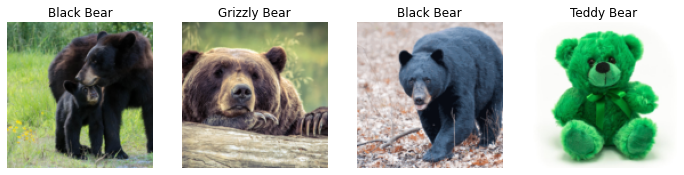

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1) 

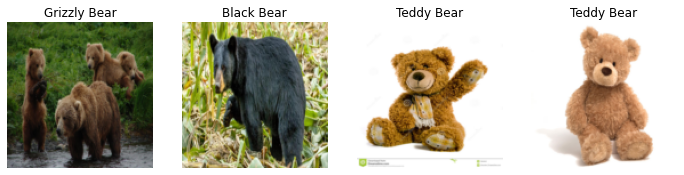

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

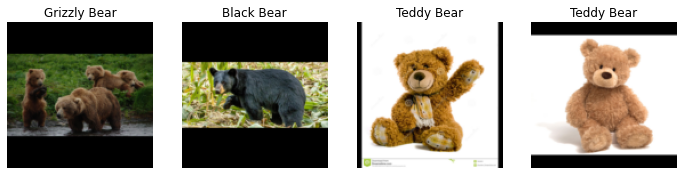

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

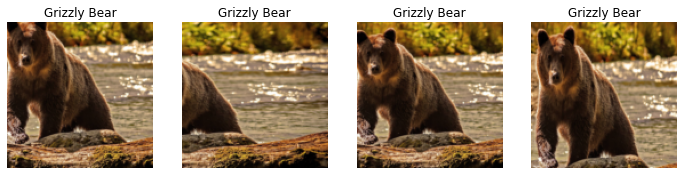

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Normally we just random select part of the image and crop to just that part.
dls = bears.dataloaders(path) # min_scale select how much of the image to select at minum for each time.
dls.train.show_batch(max_n=4, nrows=1, unique=True) #unique = True, means same image that will be selected for this randomResizeCrop

### Data Augmentation

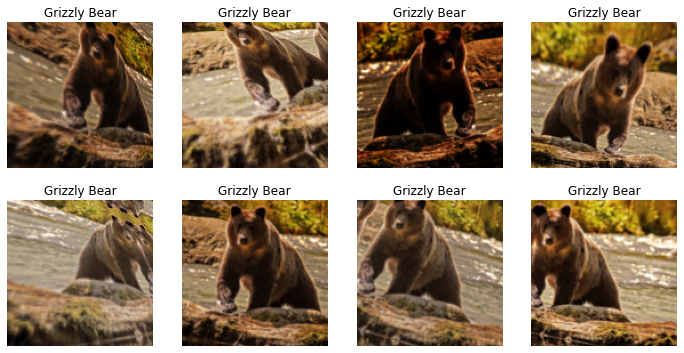

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))# max_rotate,max_lighting,max_warp are multiplied by mult                                                                     
dls = bears.dataloaders(path)  #so you can more easily increase or decrease augmentation with a single parameter
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
doc(aug_transforms)

## Training Your Model, and Using It to Clean Your Data

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


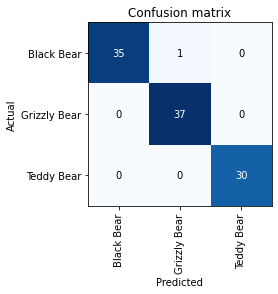

In [ ]:
interp = ClassificationInterpretation.from_learner(learn) # Since we have 150 bears per type, valid_PCT = 0.2 in datablock, which gives 30 bears per type 
interp.plot_confusion_matrix()

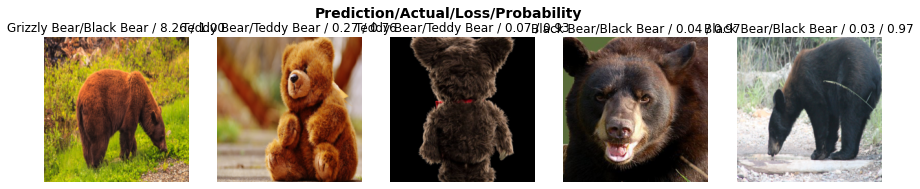

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn) # this is the view the highest-loss images(in order) from both training and validation dataset and select the one whose label is
cleaner # does not correctly reflect the image.

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
# #hide - this is to delete the pictures selected from cleaning process.
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

### Using the Model for Inference

In [ ]:
learn.export()

In [ ]:
doc(learn.export)

In [ ]:
!cp 'export.pkl' ./gdrive/MyDrive/Colab_Notebooks/Fastai/fastbook-master/

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
# learn_inf = load_learner(path/'export.pkl')
learn_inf = load_learner('/content/gdrive/MyDrive/Colab_Notebooks/Fastai/fastbook-master/export.pkl')

In [ ]:
!pwd
Path()

/content


Path('.')

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/Colab_Notebooks/Fastai/fastbook-master/images/grizzly.jpg')
# it gives predicted category;index of predicted category; probabilities of each category.

('Grizzly Bear', tensor(1), tensor([1.2352e-04, 9.9987e-01, 4.8312e-06]))

In [ ]:
learn_inf.dls.vocab # The forward mentioned index of predicted category and probability of each category
# are based on the order in the vocab of the Dataloaders. 

['Black Bear', 'Grizzly Bear', 'Teddy Bear']

### Creating a Notebook App from the Model

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['/content/gdrive/MyDrive/Colab_Notebooks/Fastai/fastbook-master/images/grizzly.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output() # to display the uploaded image
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Grizzly Bear; Probability: 0.9992')

In [ ]:
btn_run = widgets.Button(description='Classify') # need to run the call back function in the next cell first.
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
#This and the next cell are putting what we have done together for a real app.
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### Turning Your Notebook into a Real App

In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable voila —sys-prefix

### Deploying your app

## How to Avoid Disaster

### Unforeseen Consequences and Feedback Loops

## Get Writing!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain Approach?
1. How do the steps of the Drivetrain Approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?
1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?
1. What letters are often used to signify the independent and dependent variables?
1. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
1. What is data augmentation? Why is it needed?
1. What is the difference between `item_tfms` and `batch_tfms`?
1. What is a confusion matrix?
1. What does `export` save?
1. What is it called when we use a model for getting predictions, instead of training?
1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are three examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out-of-domain data"?
1. What is "domain shift"?
1. What are the three steps in the deployment process?

### Further Research

1. Consider how the Drivetrain Approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?
1. For a project you're interested in applying deep learning to, consider the thought experiment "What would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.